<a href="https://colab.research.google.com/github/nishrinarawi/hotel_investigation/blob/main/Mini_Project_Hotel_Investigation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Name: Nishrina Rawi  
LinkedIn: https://www.linkedin.com/in/nishrina-rawi/  
GitHub: https://github.com/nishrinarawi

# Objective

It is very important for a company to always analyze its business performance. On this occasion, we will delve deeper into business in the hospitality sector. Our focus is to find out how our customers behave in making hotel reservations, and its relationship to the rate of cancellation of hotel reservations. We will present the results of the insights we find in the form of data visualization to make it easier to understand and more persuasive.

# Data Information

Data description can be found [here](https://www.kaggle.com/datasets/jessemostipak/hotel-booking-demand)

### IMPORT DATA

In [103]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [104]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [105]:
df=pd.read_csv("/content/drive/MyDrive/Portofolio/hotel_bookings_data.csv")

### **DATA EXPLORATION**

In [106]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_weekdays_nights,adults,...,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status
0,Resort Hotel,0,342,2017,September,27,1,0,0,2,...,3,No Deposit,NaN,NaN,0,Personal,0.0,0,0,Check-Out
1,Resort Hotel,0,737,2017,September,27,1,0,0,2,...,4,No Deposit,NaN,NaN,0,Personal,0.0,0,0,Check-Out
2,Resort Hotel,0,7,2017,September,27,1,0,1,1,...,0,No Deposit,NaN,NaN,0,Personal,75.0,0,0,Check-Out
3,Resort Hotel,0,13,2017,September,27,1,0,1,1,...,0,No Deposit,304.0,NaN,0,Personal,75.0,0,0,Check-Out
4,Resort Hotel,0,14,2017,September,27,1,0,2,2,...,0,No Deposit,240.0,NaN,0,Personal,98.0,0,1,Check-Out


In [107]:
df.shape

(119390, 29)

In [108]:
# checking data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 29 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_weekdays_nights        119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In this data there are 119390 data, there are several columns that have missing values, including `children`, `city`, `agent`, and `company`.

In [109]:
# Statistical descriptive for numerical data
df.describe().T

,count,mean,std,min,25%,50%,75%,max
is_canceled,119390.0,0.370416,0.482918,0.00,0.00,0.000,1.0,1.0
lead_time,119390.0,104.011416,106.863097,0.00,18.00,69.000,160.0,737.0
arrival_date_year,119390.0,2018.156554,0.707476,2017.00,2018.00,2018.000,2019.0,2019.0
arrival_date_week_number,119390.0,27.165173,13.605138,1.00,16.00,28.000,38.0,53.0
arrival_date_day_of_month,119390.0,15.798241,8.780829,1.00,8.00,16.000,23.0,31.0
stays_in_weekend_nights,119390.0,0.927599,0.998613,0.00,0.00,1.000,2.0,19.0
stays_in_weekdays_nights,119390.0,2.500302,1.908286,0.00,1.00,2.000,3.0,50.0
adults,119390.0,1.856403,0.579261,0.00,2.00,2.000,2.0,55.0
children,119386.0,0.103890,0.398561,0.00,0.00,0.000,0.0,10.0
babies,119390.0,0.007949,0.097436,0.00,0.00,0.000,0.0,10.0


The `is_canceled` and `is_repeated_guest` columns have a minimum value of 0 and a maximum value of 1. This indicates that the two columns are not of integer type, but object.

In [110]:
# changing data type to appropiate data type
change=['is_canceled', 'is_repeated_guest']
df[change]=df[change].astype('object')

In [111]:
cat = ['is_canceled', 'hotel', 'arrival_date_month', 'meal', 'city', 'market_segment',
       'distribution_channel','is_repeated_guest','deposit_type','customer_type','reservation_status']

In [112]:
# descriptive statistic of categorical feature
df[cat].describe().T

,count,unique,top,freq
is_canceled,119390,2,0,75166
hotel,119390,2,City Hotel,79330
arrival_date_month,119390,12,October,13877
meal,119390,5,Breakfast,92310
city,118902,177,Kota Denpasar,48590
market_segment,119390,8,Online TA,56477
distribution_channel,119390,5,TA/TO,97870
is_repeated_guest,119390,2,0,115580
deposit_type,119390,3,No Deposit,104641
customer_type,119390,4,Personal,89613


In [113]:
# check dtypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 29 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  object 
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_weekdays_nights        119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [114]:
# list of object type feature
df.select_dtypes(include='object').columns.tolist()

['hotel',
 'is_canceled',
 'arrival_date_month',
 'meal',
 'city',
 'market_segment',
 'distribution_channel',
 'is_repeated_guest',
 'deposit_type',
 'customer_type',
 'reservation_status']

In [115]:
# list of 'int64' and 'float64' feature
df.select_dtypes(include=['int64', 'float64']).columns.tolist()

['lead_time',
 'arrival_date_year',
 'arrival_date_week_number',
 'arrival_date_day_of_month',
 'stays_in_weekend_nights',
 'stays_in_weekdays_nights',
 'adults',
 'children',
 'babies',
 'previous_cancellations',
 'previous_bookings_not_canceled',
 'booking_changes',
 'agent',
 'company',
 'days_in_waiting_list',
 'adr',
 'required_car_parking_spaces',
 'total_of_special_requests']

In [116]:
# categorize feature by its data type
cat = ['is_canceled', 'hotel', 'arrival_date_month',  'meal', 'market_segment',
       'distribution_channel','is_repeated_guest','deposit_type','customer_type','reservation_status']

num = ['arrival_date_year','arrival_date_week_number','arrival_date_day_of_month','adults','children',
       'babies','agent','company','days_in_waiting_list','adr','required_car_parking_spaces','total_of_special_requests',
       'previous_cancellations','previous_bookings_not_canceled','booking_changes', 'stays_in_weekend_nights', 'stays_in_weekdays_nights']

In [117]:
# category for each categorical feature
for i in cat:
  if df[i].dtype=='object':
    print("=====",i,"=====")
    print(df[i].value_counts())

===== is_canceled =====
is_canceled
0    75166
1    44224
Name: count, dtype: int64
===== hotel =====
hotel
City Hotel      79330
Resort Hotel    40060
Name: count, dtype: int64
===== arrival_date_month =====
arrival_date_month
October      13877
September    12661
July         11791
December     11160
June         11089
August       10939
November     10508
May           9794
April         8068
January       6794
February      6780
March         5929
Name: count, dtype: int64
===== meal =====
meal
Breakfast     92310
Dinner        14463
No Meal       10650
Undefined      1169
Full Board      798
Name: count, dtype: int64
===== market_segment =====
market_segment
Online TA        56477
Offline TA/TO    24219
Groups           19811
Direct           12606
Corporate         5295
Complementary      743
Aviation           237
Undefined            2
Name: count, dtype: int64
===== distribution_channel =====
distribution_channel
TA/TO        97870
Direct       14645
Corporate     6677
GDS    

### **DATA CLEANSING**

In [118]:
df_copy=df.copy()

#### Handling missing value

In [119]:
df_copy.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_weekdays_nights               0
adults                                 0
children                               4
babies                                 0
meal                                   0
city                                 488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
booking_changes                        0
deposit_type                           0
agent                              16340
company                           112593
days_in_waiting_list                   0
customer_type   

In [120]:
# calculate the missing values percentage
((df_copy.isnull().sum() / len(df)) * 100).sort_values(ascending=False)

company                           94.306893
agent                             13.686238
city                               0.408744
children                           0.003350
hotel                              0.000000
is_repeated_guest                  0.000000
total_of_special_requests          0.000000
required_car_parking_spaces        0.000000
adr                                0.000000
customer_type                      0.000000
days_in_waiting_list               0.000000
deposit_type                       0.000000
booking_changes                    0.000000
previous_bookings_not_canceled     0.000000
previous_cancellations             0.000000
market_segment                     0.000000
distribution_channel               0.000000
is_canceled                        0.000000
meal                               0.000000
babies                             0.000000
adults                             0.000000
stays_in_weekdays_nights           0.000000
stays_in_weekend_nights         

* In the `children` column there are 4 (0.00335%) data that have a null value
* In the `city` column there are 488 (0.408744%) data that have a null value
* In the `agent` column there are 16340 (13.69%) data that have a null value
* In the `company` column there are very large missing values, namely 94.30% of the data with NaN values.

In [121]:
df_copy['children'].mode()

0    0.0
Name: children, dtype: float64

In [122]:
# handling missing value in `children`
df_copy['children']=df_copy['children'].fillna(0)

To resolve missing values ​​in the `children` column, fill it in with the mode value in that column. Most customers do not bring children, therefore the missing value is filled with the value **0**.

In [123]:
df_copy['city']=df_copy['city'].fillna('unknown')
df_copy['company']=df_copy['company'].fillna(0)
df_copy['agent']=df_copy['agent'].fillna(0)

- For orders where the `city` value is unknown, fill in the value ***unknown***.
- The ID of the company responsible for placing orders with a null value is filled with the value **0**
- The ID of the agent responsible for placing orders with a null value is filled with the value **0**

In [124]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 29 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  object 
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_weekdays_nights        119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119390 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

After handling missing values, there are no more columns with null values.

#### Handling unsuitable value

In [125]:
df_clean=df_copy.copy()

In [126]:
df_clean=df_clean[df_clean['adr']!=-6.38]

The `adr` or average daily rate value cannot be negative, therefore data with the `adr` value is deleted.

In [127]:
# empty room
df_clean['total_guest']=df_clean['adults']+df_clean['children']+df_clean['babies']
df_clean=df_clean[df_clean['total_guest']!=0]

<ipython-input-127-25bdaffd9c75>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['total_guest']=df_clean['adults']+df_clean['children']+df_clean['babies']


By adding up the `adult`, `children`, and `babies` columns, the total guests are obtained. It is impossible for the total number of guests from one hotel booking to be 0, which means there are no guests. Therefore data with total guests=0 is deleted.

In [128]:
df_clean['not_stay']=df_clean['stays_in_weekend_nights']+df_clean['stays_in_weekdays_nights']
df_clean[df_clean['not_stay']==0]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_weekdays_nights,adults,...,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,total_guest,not_stay
0,Resort Hotel,0,342,2017,September,27,1,0,0,2,...,0.0,0.0,0,Personal,0.0,0,0,Check-Out,2.0,0
1,Resort Hotel,0,737,2017,September,27,1,0,0,2,...,0.0,0.0,0,Personal,0.0,0,0,Check-Out,2.0,0
167,Resort Hotel,0,111,2017,September,28,6,0,0,2,...,240.0,0.0,0,Personal,0.0,0,2,Check-Out,2.0,0
168,Resort Hotel,0,0,2017,September,28,6,0,0,1,...,250.0,0.0,0,Personal,0.0,0,0,Check-Out,1.0,0
196,Resort Hotel,0,8,2017,September,28,7,0,0,2,...,0.0,0.0,0,Personal,0.0,0,1,Check-Out,2.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115483,City Hotel,0,15,2019,September,27,6,0,0,1,...,14.0,0.0,0,Family,0.0,0,0,Check-Out,1.0,0
117701,City Hotel,0,0,2019,October,32,8,0,0,2,...,262.0,0.0,0,Personal,0.0,0,0,Check-Out,2.0,0
118029,City Hotel,0,0,2019,October,33,14,0,0,2,...,0.0,0.0,0,Personal,0.0,0,0,Check-Out,2.0,0
118631,City Hotel,0,78,2019,October,34,23,0,0,1,...,98.0,0.0,0,Family,0.0,0,0,Check-Out,1.0,0


In [129]:
df_clean=df_clean[df_clean['not_stay']!=0]

By adding up the columns `stays_in_weekend_nights` and `stays_in_weekdays_nights`, we get the number of weeks the customer stayed at the hotel. Customers with a value of 0 in both columns means they have never stayed at a hotel. Therefore, this data was deleted.

In [130]:
df_clean['meal'].replace('Undefined', 'No Meal', inplace=True)

<ipython-input-130-22d807092ebb>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['meal'].replace('Undefined', 'No Meal', inplace=True)


For `meal` column with a value of **Undefined**, replace it with **No Meal**

In [131]:
df_clean.describe().T

,count,mean,std,min,25%,50%,75%,max
lead_time,118564.0,104.505069,106.915647,0.0,18.0,70.0,161.0,709.0
arrival_date_year,118564.0,2018.157628,0.707712,2017.0,2018.0,2018.0,2019.0,2019.0
arrival_date_week_number,118564.0,27.157172,13.589316,1.0,16.0,28.0,38.0,53.0
arrival_date_day_of_month,118564.0,15.799686,8.782208,1.0,8.0,16.0,23.0,31.0
stays_in_weekend_nights,118564.0,0.932070,0.995426,0.0,0.0,1.0,2.0,19.0
stays_in_weekdays_nights,118564.0,2.512761,1.893239,0.0,1.0,2.0,3.0,50.0
adults,118564.0,1.860008,0.575444,0.0,2.0,2.0,2.0,55.0
children,118564.0,0.104197,0.399121,0.0,0.0,0.0,0.0,10.0
babies,118564.0,0.007962,0.097560,0.0,0.0,0.0,0.0,10.0
previous_cancellations,118564.0,0.087632,0.847176,0.0,0.0,0.0,0.0,26.0


In [132]:
df_fix=df_clean.copy()

### **EDA**

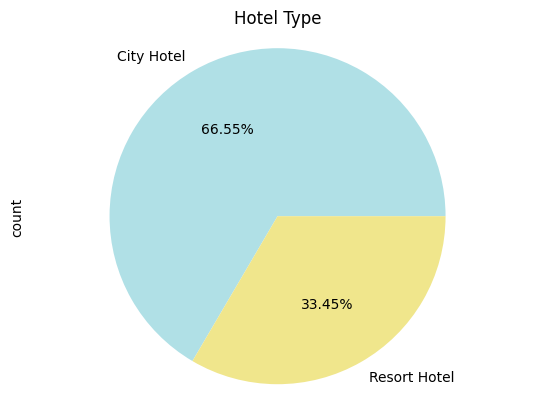

In [133]:
# pie chart of hotel type

colors = ['powderblue','khaki']

df_fix['hotel'].value_counts().plot.pie(
    autopct='%.2f%%',
    colors=colors
)

plt.title('Hotel Type')
plt.axis('equal')

plt.show()

City hotels are booked more often than resort hotels. 66.55% of the booking history consists of city hotel bookings, while the rest are resort hotel bookings.

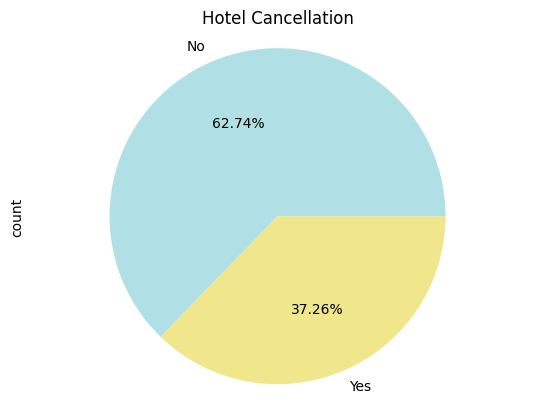

In [134]:
# pie chart of cancelation status

colors = ['powderblue','khaki']

label_mapping = {0: 'No', 1: 'Yes'}
labels = [label_mapping[label] for label in df_fix['is_canceled'].value_counts().index]

df_fix['is_canceled'].value_counts().plot.pie(
    autopct='%.2f%%',
    colors=colors,
    labels=labels
)

plt.title('Hotel Cancellation')
plt.axis('equal')

plt.show()

> From the entire hotel booking history, it is known that 37.26% of the bookings were canceled by customers.

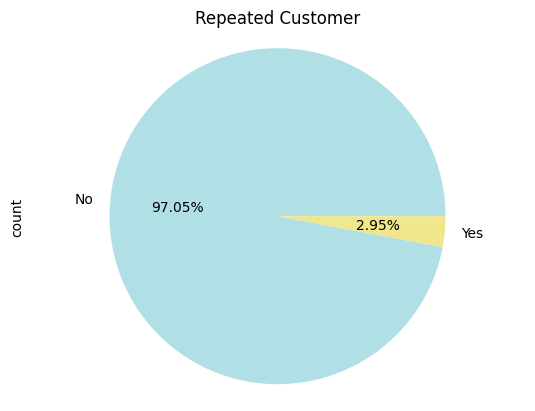

In [135]:
# pie chart of repeated guest

colors = ['powderblue','khaki']

label_mapping = {0: 'No', 1: 'Yes'}
labels = [label_mapping[label] for label in df_fix['is_repeated_guest'].value_counts().index]

df_fix['is_repeated_guest'].value_counts().plot.pie(
    autopct='%.2f%%',
    colors=colors,
    labels=labels
)

plt.title('Repeated Customer')
plt.axis('equal')

plt.show()

Only 2.95% of bookings are made by repeat customers.

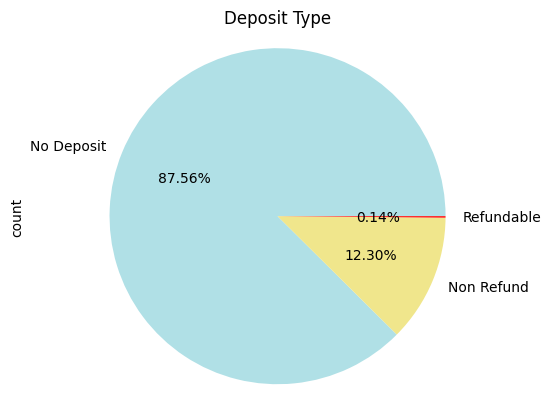

In [136]:
colors = ['powderblue','khaki','red']


df_fix['deposit_type'].value_counts().plot.pie(
    autopct='%.2f%%',
    colors=colors)

plt.title('Deposit Type')
plt.axis('equal')

plt.show()

87.56% of bookings are made without a deposit. To lower the cancellation rate, management could implement a deposit policy.

#### Monthly Hotel Booking Analysis Based on Hotel Type

In [137]:
# change data type of num_date_month
df_fix['num_date_month']=pd.to_datetime(df_fix['arrival_date_month'], format='%B').dt.month

# count sum of monthly booked by hotel type, month
monthly_book=df_fix.groupby(['hotel', 'arrival_date_month', 'num_date_month']).agg({'arrival_date_year':'nunique','is_canceled':'count'}).reset_index()
monthly_book=monthly_book.sort_values(by=['hotel','num_date_month'])
monthly_book.rename(columns={'arrival_date_month':'month','arrival_date_year':'num_year','is_canceled':'num_of_booked'}, inplace=True)
monthly_book['monthly_avg_booked']=monthly_book['num_of_booked']/monthly_book['num_year'] # average monthly booked
monthly_book

,hotel,month,num_date_month,num_year,num_of_booked,monthly_avg_booked
4,City Hotel,January,1,2,4309,2154.500000
3,City Hotel,February,2,2,4097,2048.500000
7,City Hotel,March,3,2,3712,1856.000000
0,City Hotel,April,4,2,4917,2458.500000
8,City Hotel,May,5,2,6411,3205.500000
6,City Hotel,June,6,2,7458,3729.000000
5,City Hotel,July,7,2,8184,4092.000000
1,City Hotel,August,8,2,7874,3937.000000
11,City Hotel,September,9,3,8054,2684.666667
10,City Hotel,October,10,3,8952,2984.000000


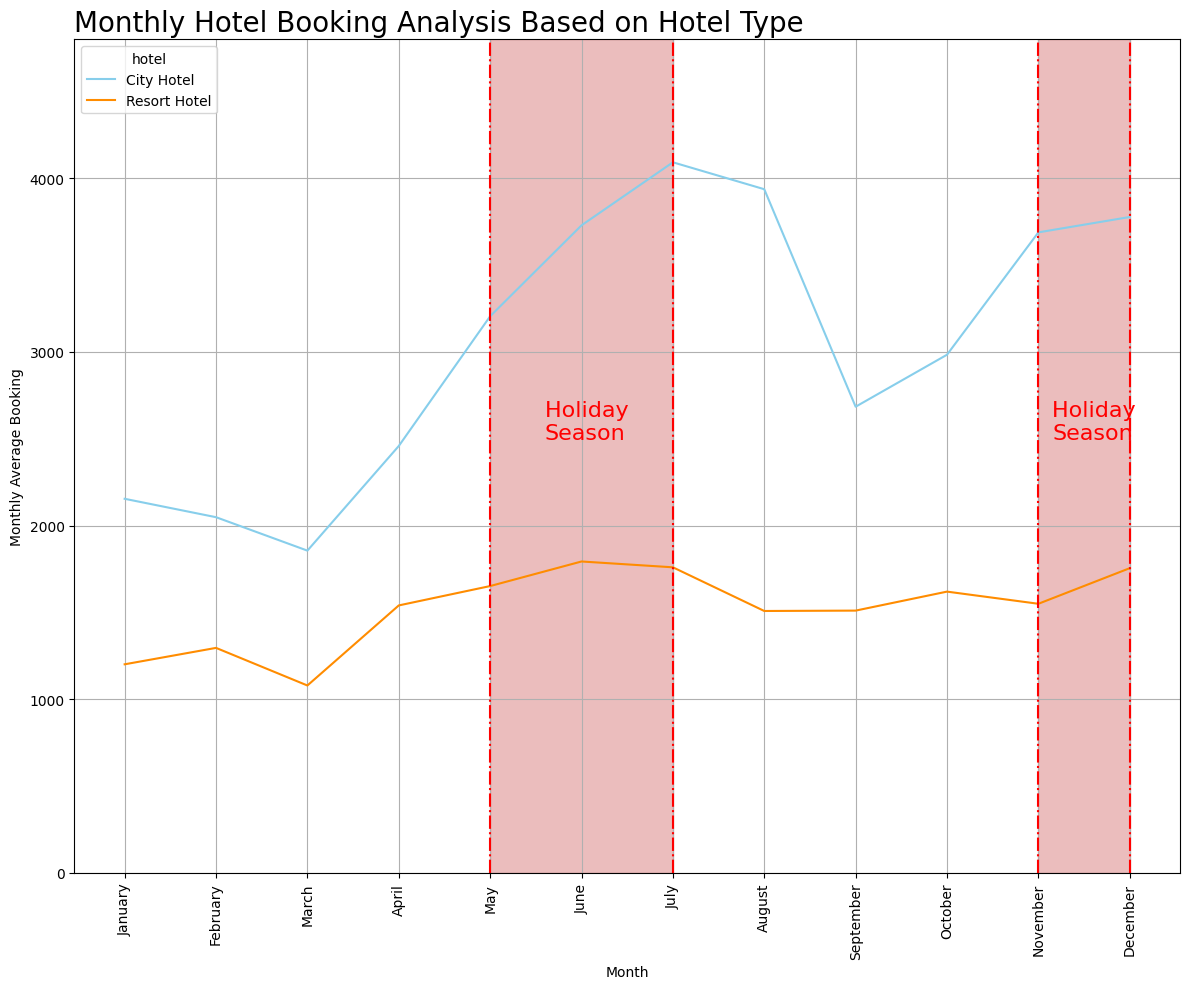

In [138]:
plt.figure(figsize=(12,10))

sns.lineplot(x='month', y='monthly_avg_booked', hue='hotel', data=monthly_book, palette=['skyblue', 'darkorange'])
plt.xticks(rotation=90)
plt.ylim(0,4800)
plt.grid()

plt.title('Monthly Hotel Booking Analysis Based on Hotel Type', fontsize=20, loc='left')
plt.xlabel('Month')
plt.ylabel('Monthly Average Booking')
plt.axvline(4, ls='-.', color='red')
plt.axvline(6, ls='-.', color='red')
plt.text(x=4.6, y=2500, s='Holiday \nSeason', fontsize=16, color='red')
plt.stackplot(np.arange(4,7,1), [[4800]], color='indianred', alpha=0.4)

plt.axvline(10, ls='-.', color='red')
plt.axvline(11, ls='-.', color='red')
plt.text(x=10.15, y=2500, s='Holiday \nSeason', fontsize=16, color='red')
plt.stackplot(np.arange(10,12,1), [[4800]], color='indianred', alpha=0.4)

plt.tight_layout()

> The patterns in average monthly bookings for City Hotels and Resort Hotels are similar, both experiencing fluctuations from month to month. However, the average monthly bookings for City Hotels are consistently higher than those for Resort Hotels, due to the greater volume of bookings at City Hotels. Notably, there are increases during the holiday seasons in Indonesia, particularly from May to July and at the end of the year. The peak in average hotel bookings occurs in July.

#### Impact Analysis of Stay Duration on Hotel Bookings Cancellation Rates

In [139]:
df_fix['stay_duration']=df_fix['stays_in_weekdays_nights']+df_fix['stays_in_weekend_nights']

Text(0.5, 1.0, 'Stay Duration Density Distribution')

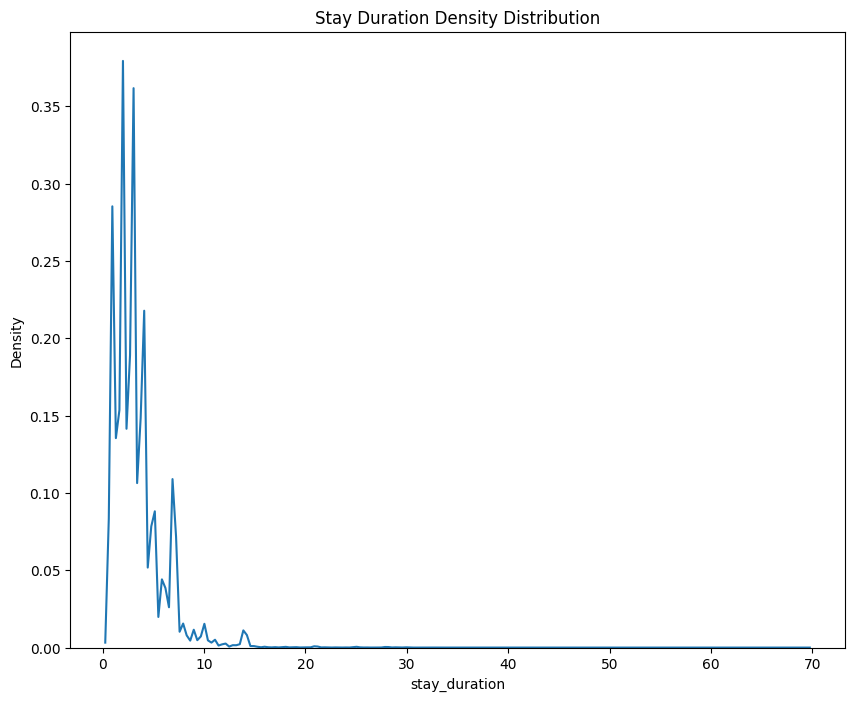

In [140]:
plt.figure(figsize=(10,8))
sns.kdeplot(x='stay_duration', data=df_fix)
plt.title('Stay Duration Density Distribution')

In [141]:
df_fix['stay_duration'].describe()

count    118564.000000
mean          3.444831
std           2.534900
min           1.000000
25%           2.000000
50%           3.000000
75%           4.000000
max          69.000000
Name: stay_duration, dtype: float64

In [142]:
df_fix.groupby('stay_duration').agg({'is_canceled':'count'})

,is_canceled
stay_duration,
1,21005
2,27632
3,27064
4,17373
5,7771
6,3846
7,8648
8,1155
9,840


In [143]:
def categorize_stay(duration):
  if duration<=5:
    return '1-5'
  elif duration > 5 and duration <=10:
    return '6-10'
  elif duration > 10 and duration <=15:
    return '11-15'
  elif duration > 15 and duration <=20:
    return '16-20'
  elif duration > 20 and duration <=25:
    return '21-25'
  else:
    return '>25'

df_fix['stay_category']=df_fix['stay_duration'].apply(categorize_stay)

Based on the distribution of stay duration, it is known that the data is distributed in a positive-skew manner, or the data accumulates at small stay durations. Therefore the data will be regrouped with the following conditions:

- duration<=5 = '1-5'
- duration > 5 and duration <=10 = **'6-10'**
- duration > 10 and duration <=15 = **'11-15'**
- duration > 15 and duration <=20 = **'16-20'**
- duration > 20 and duration <=25 = **'21-25'**
- duration >25 = **'>25'**

In [144]:
stay_cancelation=df_fix.groupby(['hotel', 'stay_category', 'is_canceled']).agg({'arrival_date_month':'count'}).reset_index()
stay_cancelation.rename(columns={'arrival_date_month':'num_bookings'}, inplace=True)
stay_cancelation_pivot=stay_cancelation.pivot_table(index=['hotel', 'stay_category'], columns='is_canceled', values='num_bookings').reset_index()
stay_cancelation_pivot['%']=round(stay_cancelation_pivot[1]*100/(stay_cancelation_pivot[0]+stay_cancelation_pivot[1]),2)

In [145]:
stay_cancelation_pivot

is_canceled,hotel,stay_category,0,1,%
0,City Hotel,1-5,42931,30645,41.65
1,City Hotel,11-15,121,198,62.07
2,City Hotel,16-20,14,42,75.00
3,City Hotel,21-25,5,21,80.77
4,City Hotel,6-10,2760,2131,43.57
5,City Hotel,>25,2,29,93.55
6,Resort Hotel,1-5,20115,7154,26.23
7,Resort Hotel,11-15,1057,363,25.56
8,Resort Hotel,16-20,32,43,57.33
9,Resort Hotel,21-25,57,52,47.71


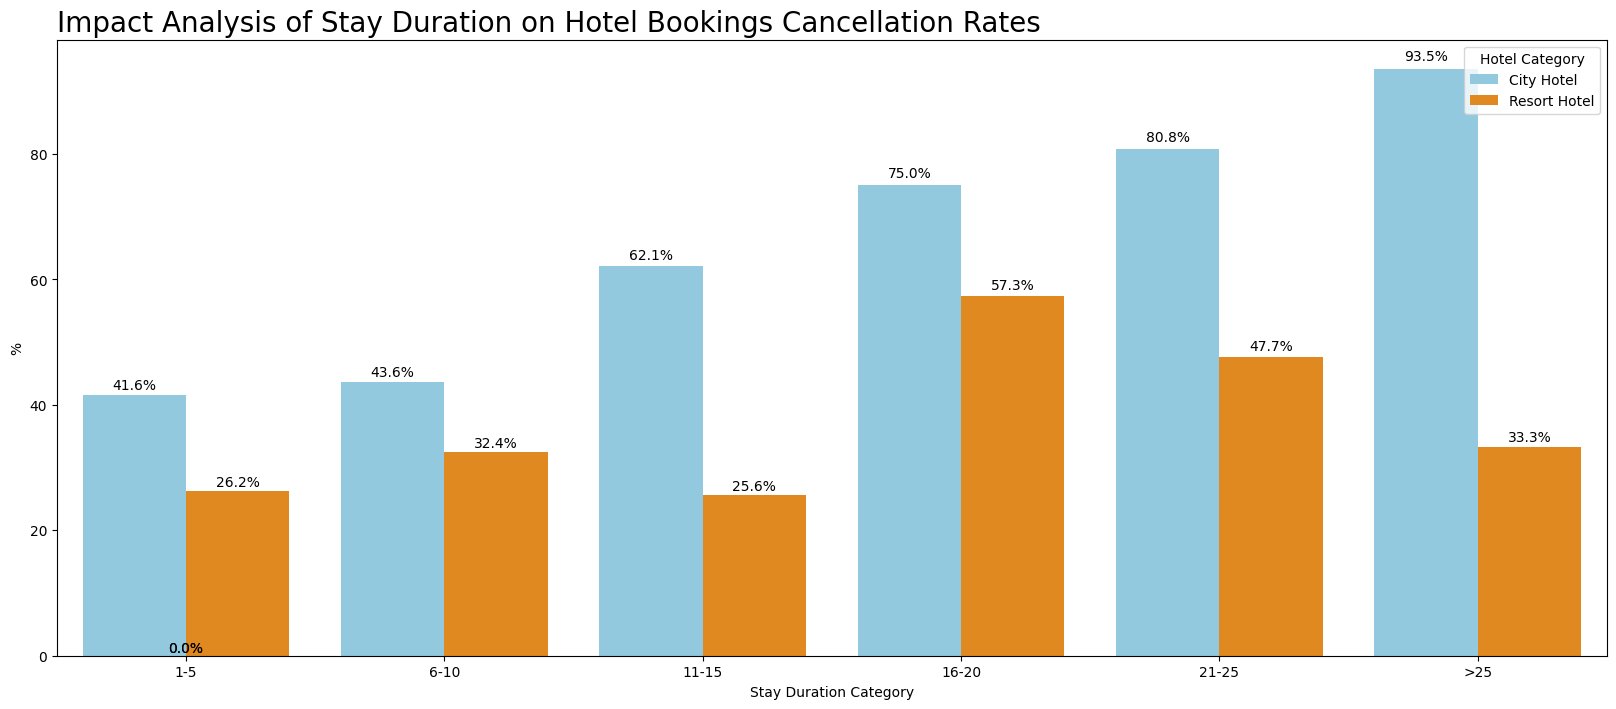

In [146]:
# Pivot the dataframe to create a stacked bar chart

# Plot stacked bar chart
plt.figure(figsize=(20,8))
sns.barplot(x='stay_category', y='%', hue='hotel', data=stay_cancelation_pivot, order=['1-5', '6-10', '11-15', '16-20', '21-25', '>25'], palette=['skyblue', 'darkorange'])

for p in plt.gca().patches:
    height = p.get_height()
    plt.gca().text(p.get_x() + p.get_width() / 2, height * 1.01, '{:.1f}%'.format(height), ha='center', va='bottom', fontsize=10)

plt.xlabel('Stay Duration Category')
plt.ylabel('%')
plt.title('Impact Analysis of Stay Duration on Hotel Bookings Cancellation Rates', fontsize=20, loc='left')
plt.legend(title='Hotel Category', loc='upper right')
plt.show()

The cancellation rates of resort hotels fluctuate based on stay duration categories, whereas for city hotels, the cancellation rate increases linearly with stay duration. The longer the stay duration at booking, the higher the cancellation rate of those reservations. For stays longer than 25 days, the cancellation rate reaches 93.5%.

#### Impact Analysis of Lead Time on Hotel Bookings Cancellation Rate

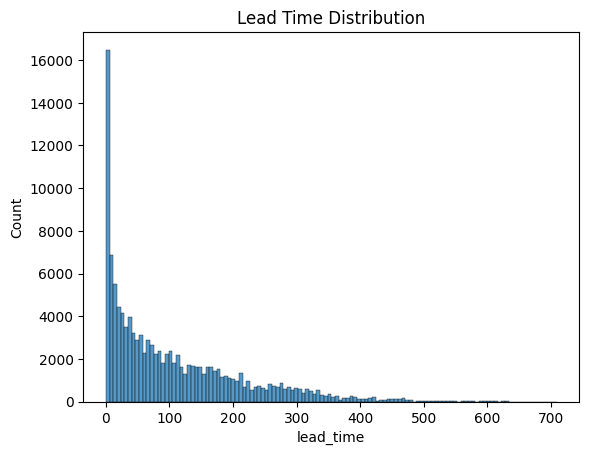

In [147]:
sns.histplot(x='lead_time', data=df_fix)
plt.title('Lead Time Distribution')
plt.show()

In [148]:
df_fix['lead_time'].describe()

count    118564.000000
mean        104.505069
std         106.915647
min           0.000000
25%          18.000000
50%          70.000000
75%         161.000000
max         709.000000
Name: lead_time, dtype: float64

In [149]:
df_fix.groupby('lead_time').agg({'is_canceled':'count'})

,is_canceled
lead_time,
0,6007
1,3386
2,2042
3,1804
4,1697
...,...
615,17
622,17
626,30


In [150]:
def booking_interval_cat(duration):
  if duration<=7:
    return '1-7 days'
  elif duration >7 and duration <=14:
    return '8-14 days'
  elif duration >14 and duration <=30:
    return '<1 month'
  elif duration >30 and duration <=90:
    return '>1-3 months'
  elif duration >90 and duration <=180:
    return '>3-6 month'
  elif duration >180 and duration <=365:
    return '>6-12 month'
  else:
    return '>1 year'

df_fix['booking_interval']=df_fix['lead_time'].apply(booking_interval_cat)

> Lead time of booking is recategorizing with the following criteria:

- duration<=7: = **'1-7 days'**
- duration >7 and duration <=14 = **'8-14 days'**
- duration >14 and duration <=30 = **'<1 month'**
- duration >30 and duration <=90 = **'>1-3 months'**
- duration >90 and duration <=180 = **'>3-6 month'**
- duration >180 and duration <=365 = **'>6-12 month'**
- more than 365 days = '>1 year'


In [151]:
interval_group=df_fix.groupby(['hotel', 'booking_interval', 'is_canceled']).agg({'arrival_date_month':'count'}).reset_index()
interval_group.rename(columns={'arrival_date_month':'num_bookings'}, inplace=True)
interval_group_pivot=interval_group.pivot_table(index=['hotel', 'booking_interval'], columns='is_canceled', values='num_bookings').reset_index()
interval_group_pivot['%']=round(interval_group_pivot[1]*100/(interval_group_pivot[0]+interval_group_pivot[1]),2)
interval_group_pivot

is_canceled,hotel,booking_interval,0,1,%
0,City Hotel,1-7 days,9215,1296,12.33
1,City Hotel,8-14 days,3421,1132,24.86
2,City Hotel,<1 month,5212,2746,34.51
3,City Hotel,>1 year,781,1922,71.11
4,City Hotel,>1-3 months,12451,8297,39.99
5,City Hotel,>3-6 month,9456,8744,48.04
6,City Hotel,>6-12 month,5297,8929,62.77
7,Resort Hotel,1-7 days,8158,577,6.61
8,Resort Hotel,8-14 days,2024,411,16.88
9,Resort Hotel,<1 month,2914,988,25.32


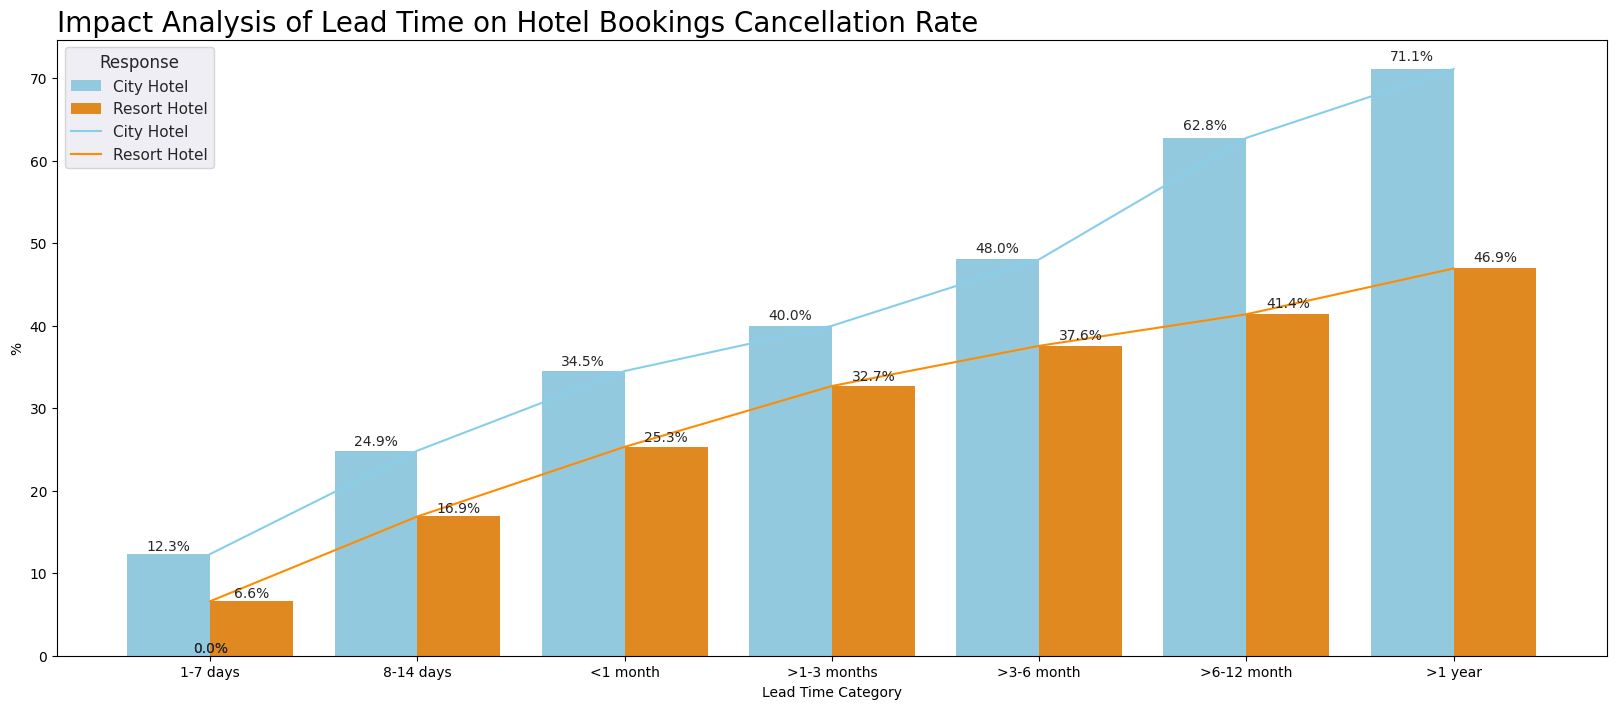

In [152]:
# Pivot the dataframe to create a stacked bar chart

# Plot stacked bar chart
plt.figure(figsize=(20,8))
sns.barplot(x='booking_interval', y='%', hue='hotel', data=interval_group_pivot,
            order=['1-7 days', '8-14 days', '<1 month', '>1-3 months', '>3-6 month', '>6-12 month', '>1 year'], palette=['skyblue', 'darkorange'])
sns.lineplot(x='booking_interval', y='%', hue='hotel', data=interval_group_pivot, palette=['skyblue', 'darkorange'])
sns.set()

for p in plt.gca().patches:
    height = p.get_height()
    plt.gca().text(p.get_x() + p.get_width() / 2, height * 1.01, '{:.1f}%'.format(height), ha='center', va='bottom', fontsize=10)

plt.xlabel('Lead Time Category')
plt.ylabel('%')
plt.title('Impact Analysis of Lead Time on Hotel Bookings Cancellation Rate', fontsize=20, loc='left')
plt.legend(title='Response', loc='upper left')
plt.show()

Both city hotel and resort hotel cancellation rates are more likely to increase as the time between booking and the hotel check-in date lengthens.

### RECOMMENDATION

- Offering discount vouchers to customers who have booked and stayed at the hotel multiple times is a strategy to encourage repeat bookings.
- Implementing a deposit policy can help reduce the cancellation rate. When customers are required to pay a deposit, they are more likely to commit to their bookings, as they have a financial stake in the reservation. This reduces the likelihood of cancellations and helps ensure more stable occupancy rates.
- Implement dynamic pricing and flexible cancellation policies to manage fluctuations in bookings, especially during peak holiday seasons. For City Hotels, consider offering discounts or incentives for longer stays to mitigate the higher cancellation rates associated with extended bookings.
- Customers with a good booking history may be less likely to cancel their reservations compared to first-time or infrequent guests. By prioritizing these customers, hotels can potentially reduce the risk of cancellations during high-demand periods, ensuring more stable occupancy rates.